In [76]:
%matplotlib inline
from IPython.display import display, Math, Latex

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

plt.rcParams['figure.figsize'] = (12,6)

Min/max pixel values:4760-65532


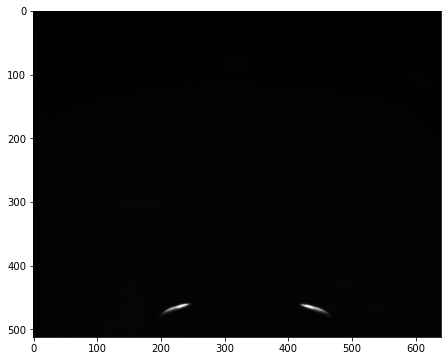

In [114]:
#Uncomment the line with desired image

# img = Image.open('assets/220us_no_light.tif')       #220µs exposure. Halogen lamps off
# img = Image.open('assets/220us.tif')       #220µs exposure. Camera gain 0
# img = Image.open('assets/220us_gain1.tif') #220µs exposure. Camera gain 1
# img = Image.open('assets/220us_gain2.tif') #220µs exposure. Camera gain 2
# img = Image.open('assets/220us_highB.tif') #220µs exposure. Camera gain 0. High Beams on
# img = Image.open('assets/1000us_no_light.tif')       #1000µs exposure. Halogen lamps off
# img = Image.open('assets/1000us.tif')       #1000µs exposure. Halogen lamps on
img = Image.open('assets/1000us_highB.tif')       #1000µs exposure. Halogen lamps on + high beams

# display the image
plt.imshow(img, cmap='gray', vmin=0, vmax=2**15);
print ('Min/max pixel values:{}-{}'.format(np.asarray(img).min(), np.asarray(img).max()))

In [116]:
# convert image into a numpy array
img = np.asarray(img)

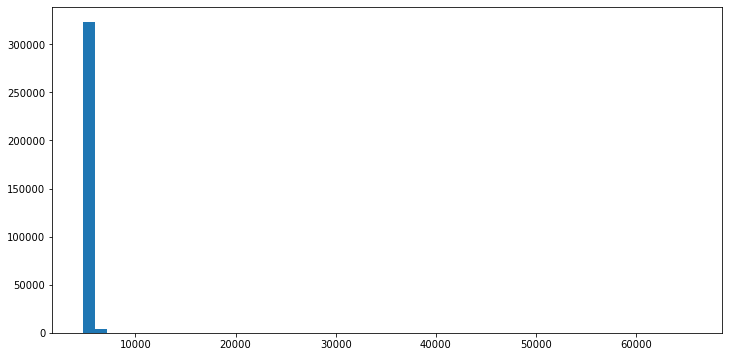

In [117]:
# put pixels in a 1D array by flattening out img array
flat = img.flatten()

# show the histogram
plt.hist(flat, bins=50);

In [118]:
# formula for creating the histogram
display(Math(r'P_x(j) = \sum_{i=0}^{j} P_x(i)'))

<IPython.core.display.Math object>

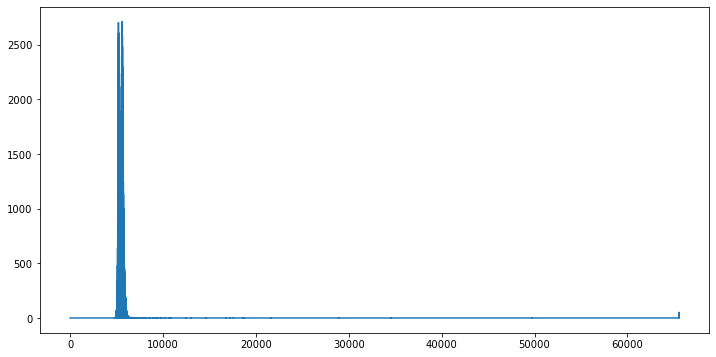

In [119]:
# create our own histogram function
def get_histogram(image, bins):
    # array with size of bins, set to zeros
    histogram = np.zeros(bins)
    
    # loop through pixels and sum up counts of pixels
    for pixel in image:
        histogram[pixel] += 1
    
    # return our final result
    return histogram

hist = get_histogram(flat, 2**16)

plt.plot(hist);

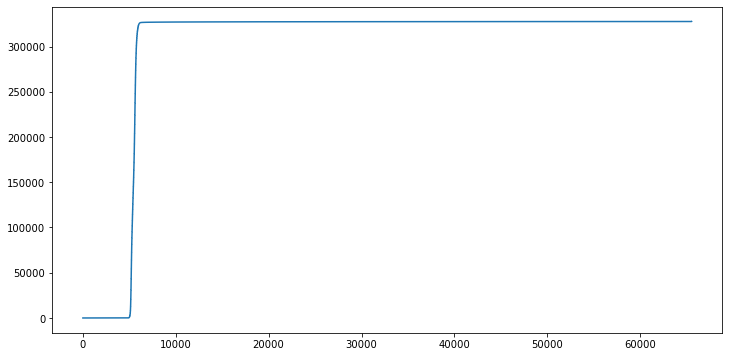

In [120]:
# create our cumulative sum function
def cumsum(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

# execute the fn
cs = cumsum(hist)

# display the result
plt.plot(cs);

In [121]:
# formula to calculate cumulation sum
display(Math(r's_k = \sum_{j=0}^{k} {\frac{n_j}{N}}'))

<IPython.core.display.Math object>

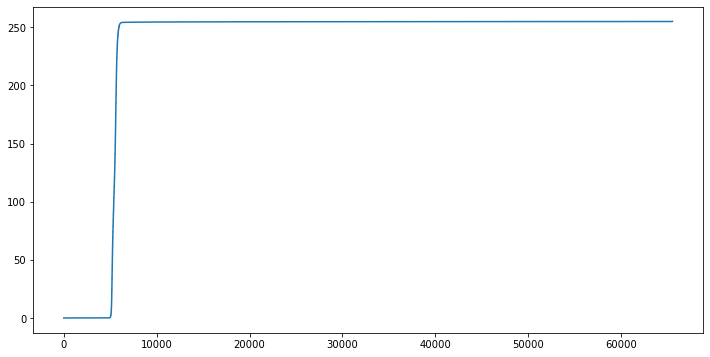

In [122]:
# re-normalize cumsum values to be between 0-255

# numerator & denomenator
nj = (cs - cs.min()) * 255
N = cs.max() - cs.min()

# re-normalize the cdf
cs = nj / N

plt.plot(cs);

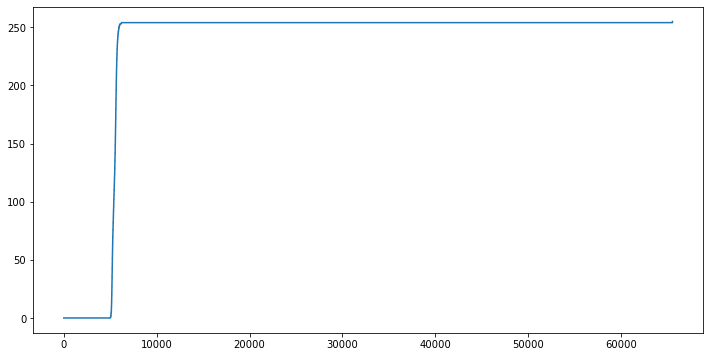

In [123]:
# cast it back to uint8 since we can't use floating point values in images
cs = cs.astype('uint8')

plt.plot(cs);

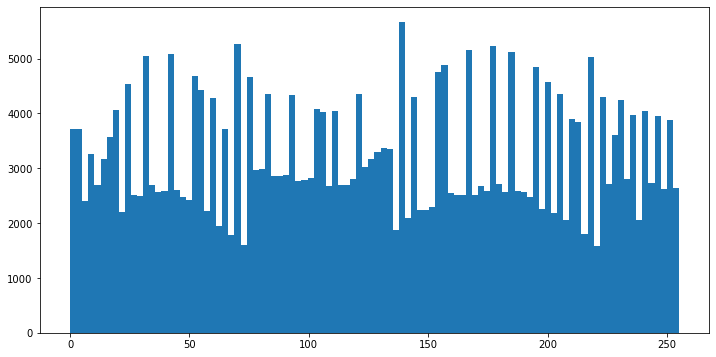

In [124]:
# get the value from cumulative sum for every index in flat, and set that as img_new
img_new = cs[flat]

# we see a much more evenly distributed histogram
plt.hist(img_new, bins=100);

In [125]:
# put array back into original shape since we flattened it
img_new = np.reshape(img_new, img.shape)

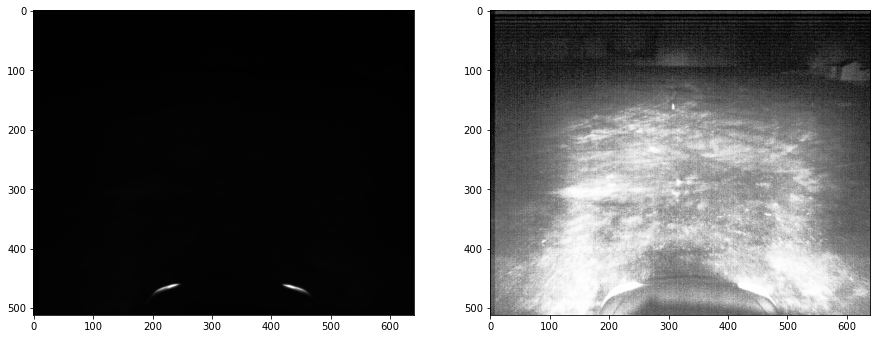

In [126]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray', vmin=0, vmax=2**15)

# display the new image
fig.add_subplot(1,2,2)
plt.imshow(img_new, cmap='gray', vmin=0, vmax=2**8)

plt.show(block=True)